## Question 1 ##

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [330]:
# Question 1
# Part 1: 3H concentration in 2010 after decay only
# Part 2: bias from terrigenic He when using 3H/3He dating

# Part 1
# -----------------------------
# STEP 1 — Identify decay model + variables
#   dM/dt = -kM  ->  M(t) = M0 * exp(-k t)
#   and  t1/2 = ln(2)/k  ->  k = ln(2)/t1/2
# -----------------------------

# -----------------------------
# STEP 2 — Use tritium half-life
# -----------------------------
t_half_years = 12.43  # years

# -----------------------------
# STEP 3 — Set initial concentration and elapsed time
# Given in the problem: Ottawa precipitation peak = 2000 TU in 1962
# -----------------------------
M0_TU = 2000.0
year_recharge = 1962
year_target = 2010
t_years = year_target - year_recharge  # elapsed time in years

# -----------------------------
# STEP 4 — Compute decay constant k
#   k = ln(2)/t1/2
# -----------------------------
k_per_year = math.log(2) / t_half_years  # decay per year

# -----------------------------
# STEP 5 — Apply tritium decay equation
#   R_3H = R_3H0 * exp(-k * t)
M2010_TU = M0_TU * math.exp(-k_per_year * t_years)

# Cross-check using half-life form:
M2010_TU_half_life_form = M0_TU * (0.5) ** (t_years / t_half_years)
# -----------------------------

# -----------------------------
# Answers printed
# -----------------------------
print("Question 1 — Part 1")
print("Tritium decay-only calculation")
print(f"Half-life (t1/2) = {t_half_years:.2f} years")
print(f"Elapsed time (t) = {t_years} years  (2010 - 1962)")
print(f"Decay constant (k) = {k_per_year:.5f} 1/yr")
print(f"M0 (1962) = {M0_TU:.1f} TU")
print(f"M(2010) = {M2010_TU:.1f} TU   using exp(-kt)")
print(f"M(2010) = {M2010_TU_half_life_form:.1f} TU   check using (1/2)^(t/t1/2)")

print("\nQuestion 1 — Part 2")
print("If terrigenic helium is present, the extra H3 can be mis-interpreted and assumed to be 3He produced from")
print("anthropegenic 3H. The terrigencic helium will inflate the 3He*/3H ratio used for dating and the age bias will")
print("lean toward making the water seem too old.")


Question 1 — Part 1
Tritium decay-only calculation
Half-life (t1/2) = 12.43 years
Elapsed time (t) = 48 years  (2010 - 1962)
Decay constant (k) = 0.05576 1/yr
M0 (1962) = 2000.0 TU
M(2010) = 137.6 TU   using exp(-kt)
M(2010) = 137.6 TU   check using (1/2)^(t/t1/2)

Question 1 — Part 2
If terrigenic helium is present, the extra H3 can be mis-interpreted and assumed to be 3He produced from
anthropegenic 3H. The terrigencic helium will inflate the 3He*/3H ratio used for dating and the age bias will
lean toward making the water seem too old.


## Question 2 ##

In [331]:
# Question 2
# Part 1: Apparent age of groundwater sample if no dilution correction is considered
# Part 2: Corrected age of gw sample if dilution correction is considered
# Part 3: Calculate age bias & discuss effect of ignoring dilution correction

# Part 1: Apparent age of groundwater sample if no dilution correction is considered
# -----------------------------
# --- Given data ---
A_sample = 25.0      # pMC (measured groundwater 14C activity)
A_bio    = 100.0     # pMC (biogenic initial activity, treated as A0 for apparent age)

#  (t = -8267 ln(A/A0))     # age of sample equation for 14C
t_app = -8267.0 * math.log(A_sample / A_bio)
# -----------------------------


# Part 2: Corrected age of gw sample if dilution correction is considered
# -----------------------------
# STEP 1 — Find dilution factor q, C_bio, and C_endog
# --- Given isotopic + DIC data ---
delta_sample = -12.0   # ‰
delta_bio    = -28.0   # ‰
delta_endog  = -6.0    # ‰
C_sample     = 4.0     # mmol/L (total DIC)

# --- Dilution factor q from δ13C mixing ---
q = (delta_sample - delta_endog) / (delta_bio - delta_endog)
C_bio   = q * C_sample
C_endog = (1 - q) * C_sample
# -----------------------------

# -----------------------------
# STEP 2 - Find corrected age
# Corrected initial activity (effective A0)
# Corrected form uses q * A_bio in denominator
A0_eff = q * A_bio
t_corr = -8267.0 * math.log(A_sample / A0_eff)
# -----------------------------

# Part 3: Calculate age bias & discuss effect of ignoring dilution correction
# -----------------------------
bias = t_app - t_corr
bias_percent = bias / t_corr * 100
# -----------------------------

# -----------------------------
# Answers printed
# -----------------------------
print("Question 2 — Part 1")
print(f"Apparent age of gw with no dilution correction = {t_app:,.0f} years")
print("\nQuestion 2 — Part 2")
print (f"Dilution factor q = {q:.4f}")
print (f"Concentration of biogenic DIC = {C_bio:.2f} mmol/L")
print (f"Concentration of endogenic DIC = {C_endog:.2f} mmol/L")
print (f"Corrected initial activity = {A0_eff:.2f} pMC")
print(f"Corrected age of gw sample considering dilution correction = {t_corr:.0f} years")
print("\nQuestion 2 — Part 3")
print(f"Age bias = {bias:,.0f} years younger than actual age")
print(f"Ignoring dilution correction overestimates the groundwater age by {bias_percent:.0f}% (compared to the corrected age).")

Question 2 — Part 1
Apparent age of gw with no dilution correction = 11,460 years

Question 2 — Part 2
Dilution factor q = 0.2727
Concentration of biogenic DIC = 1.09 mmol/L
Concentration of endogenic DIC = 2.91 mmol/L
Corrected initial activity = 27.27 pMC
Corrected age of gw sample considering dilution correction = 719 years

Question 2 — Part 3
Age bias = 10,741 years younger than actual age
Ignoring dilution correction overestimates the groundwater age by 1493% (compared to the corrected age).


## Question 3 ##

In [332]:
# Question 3 - Two-component isotope hydrograph separation
# Water balance equation: Qt = Qp + Qe
# Tracer balance equations: Qe = Qt * (Ct - Cp)/(Ce - Cp)
#                           Qp = Qt * (Ce - Ct)/(Ce - Cp)

# Given values
Qt = 10.0         # m^3/s total streamflow
Ct = -9.0         # ‰ stream δ18O
Ce = -5.0         # ‰ event water (rain) δ18O
Cp = -12.0        # ‰ pre-event water (groundwater) δ18O

# Compute Qe and Qp
Qe = Qt * (Ct - Cp) / (Ce - Cp)
Qp = Qt * (Ce - Ct) / (Ce - Cp)  # or Qt - Qe

# -----------------------------
# Answers printed
# -----------------------------
print("Question 3 - Part 1")
print(f"Total streamflow: Qt = {Qt:.2f} m^3/s")
print(f"Event water discharge: Qe = {Qe:.2f} m^3/s")
print(f"Pre-event water discharge: Qp = {Qp:.2f} m^3/s")

print("\nQuestion 3 - Part 2")
if Qe > Qp:
    print("Dominant component: EVENT water (rainfall)")
else:
    print("Dominant component: PRE-EVENT water (groundwater)")


Question 3 - Part 1
Total streamflow: Qt = 10.00 m^3/s
Event water discharge: Qe = 4.29 m^3/s
Pre-event water discharge: Qp = 5.71 m^3/s

Question 3 - Part 2
Dominant component: PRE-EVENT water (groundwater)


## Question 4 ##

#### Question 4: Part 1

In [333]:
# Question 4, part 1 - Calculate fractions of each source at each sample time and plot a figure that 
# shows event water fraction vs. time

# -----------------------------
# STEP 1 — Create tables of endmembers and observations

# -----------------------------
# Endmembers (Table 1)      # Dictionary of dictionaries
# -----------------------------
endmembers = {
    "event_rain": {"d18O": -4.0, "Si": 1.0},
    "soil":       {"d18O": -8.0, "Si": 8.0},
    "gw":         {"d18O": -11.0,"Si": 20.0},
}

# -----------------------------
# Observations (Table 2)    # Pandas DataFrame
# -----------------------------
data = pd.DataFrame({
    "time_hr": [0, 2, 4, 6, 10, 16, 24],
    "Qt_m3s":  [2.0, 4.5, 9.0, 12.0, 7.0, 4.0, 2.5],            # Streamflow
    "d18O_t":  [-11.0, -9.5, -8.5, -7.8, -8.8, -9.8, -10.5],    # δ18O ‰
    "Si_t":    [18, 15, 12, 10, 13, 16, 17],                    # Silica mg/L
})
data


,time_hr,Qt_m3s,d18O_t,Si_t
0,0,2.0,-11.0,18
1,2,4.5,-9.5,15
2,4,9.0,-8.5,12
3,6,12.0,-7.8,10
4,10,7.0,-8.8,13
5,16,4.0,-9.8,16
6,24,2.5,-10.5,17


In [334]:
# -----------------------------
# Question 4, part 1 - STEP 2 — Build the coefficient matrix A for [f_event, f_soil, f_gw]
# Calculate fractions of each source at each sample time and plot 
# a figure that shows event water fraction vs time

A = np.array([
    [1.0, 1.0, 1.0],
    [endmembers["event_rain"]["Si"],  endmembers["soil"]["Si"],  endmembers["gw"]["Si"]],
    [endmembers["event_rain"]["d18O"],endmembers["soil"]["d18O"],endmembers["gw"]["d18O"]],
], dtype=float)

fractions = []
for _, row in data.iterrows():      # Loop through each row of the storm time series
    b = np.array([1.0, row["Si_t"], row["d18O_t"]], dtype=float)  # Build vector 'b' (right side of equation)
    f_event, f_soil, f_gw = np.linalg.solve(A, b)   # Solve for the fractions at that time
    fractions.append((f_event, f_soil, f_gw))       # Store fractions in the list

data[["f_event", "f_soil", "f_gw"]] = pd.DataFrame(fractions, index=data.index)     #Update data DataFrame

# Convert fractions to component discharges
data["Q_event"] = data["f_event"] * data["Qt_m3s"]
data["Q_soil"]  = data["f_soil"]  * data["Qt_m3s"]
data["Q_gw"]    = data["f_gw"]    * data["Qt_m3s"]

data


,time_hr,Qt_m3s,d18O_t,Si_t,f_event,f_soil,f_gw,Q_event,Q_soil,Q_gw
0,0,2.0,-11.0,18,-0.222222,0.518519,0.703704,-0.444444,1.037037,1.407407
1,2,4.5,-9.5,15,0.111111,0.240741,0.648148,0.500000,1.083333,2.916667
2,4,9.0,-8.5,12,0.222222,0.314815,0.462963,2.000000,2.833333,4.166667
3,6,12.0,-7.8,10,0.311111,0.340741,0.348148,3.733333,4.088889,4.177778
4,10,7.0,-8.8,13,0.200000,0.266667,0.533333,1.400000,1.866667,3.733333
5,16,4.0,-9.8,16,0.088889,0.192593,0.718519,0.355556,0.770370,2.874074
6,24,2.5,-10.5,17,-0.111111,0.425926,0.685185,-0.277778,1.064815,1.712963


In [335]:
# -----------------------------
# Question 4, part 1 - STEP 3 - Checks

# Check mass balance
data["f_sum"] = data["f_event"] + data["f_soil"] + data["f_gw"]
data[["time_hr","f_sum"]]


,time_hr,f_sum
0,0,1.0
1,2,1.0
2,4,1.0
3,6,1.0
4,10,1.0
5,16,1.0
6,24,1.0


In [336]:
# -----------------------------
# Question 4, part 1 - STEP 3 Checks continued

# Flag any time points where a fraction is negative or >1 (located outside triangle)
def flag_row(row):
    f = np.array([row["f_event"], row["f_soil"], row["f_gw"]])
    return (f < -1e-8).any() or (f > 1+1e-8).any()

data["outside_triangle_flag"] = data.apply(flag_row, axis=1)

data[["time_hr","f_event","f_soil","f_gw","outside_triangle_flag"]]


,time_hr,f_event,f_soil,f_gw,outside_triangle_flag
0,0,-0.222222,0.518519,0.703704,True
1,2,0.111111,0.240741,0.648148,False
2,4,0.222222,0.314815,0.462963,False
3,6,0.311111,0.340741,0.348148,False
4,10,0.200000,0.266667,0.533333,False
5,16,0.088889,0.192593,0.718519,False
6,24,-0.111111,0.425926,0.685185,True


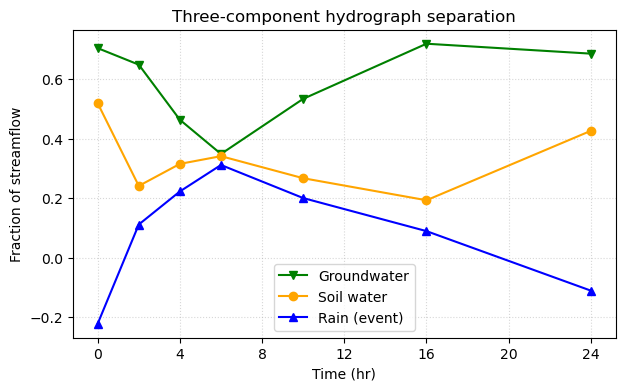

In [345]:
# -----------------------------
# Question 4, part 1 - STEP 4 - Plot a figure that shows event water fraction vs time

plt.figure(figsize=(7,4))

plt.plot(data["time_hr"], data["f_gw"], color="green", marker="v", label="Groundwater")
plt.plot(data["time_hr"], data["f_soil"], color="orange", marker="o", label="Soil water")
plt.plot(data["time_hr"], data["f_event"], color="blue", marker="^", label="Rain (event)")

plt.xlabel("Time (hr)")
plt.ylabel("Fraction of streamflow")
plt.title("Three-component hydrograph separation")

# --- Set x-axis ticks every 4 hours ---
xmin = 0
xmax = data["time_hr"].max()
plt.xticks(np.arange(xmin, xmax + 4, 4))

# --- Grid lines at tick locations ---
plt.grid(True, which="major", axis="both", linestyle=":", alpha=0.5)

plt.legend()
plt.grid(True)
plt.show()


#### Question 4: Part 2

Part 2: Using your calculations and figures, discuss how the dominant water source varies over time. Which water source dominates the rising limb, peak flow, and falling limb? 

Before and throughout the event, groundwater is the dominant water source in streamflow though there is a lot of fluctuation. Before the event, groundwater dominates with minor soil water contribution; event water is negligible. During the rising limb, groundwater and soil water drop sharply, while rainwater rises quickly. At peak flow (6 hours), all three components become comparable in magnitude, but groundwater remains slightly larger. During the falling limb, groundwater rises steadily while soil water and rainwater both drop smoothly. However, after 16 hours, when the rain contribution tapers back to zero, soil water rises and groundwater drops slightly so those two components end up with fractions of streamflow comparable to their original contributions. 

#### Question 4: Part 3
Part 3: Does the catchment exhibit flashy overland flow behavior or storage-controlled subsurface flow? 

This hydrograph reflects storage-controlled subsurface flow rather than flashy overland flow. During the entire event, groundwater remains the largest component of the streamflow. Event water never exceeds roughly one-third of total streamflow and most stormflow originates from stored subsurface water rather than rapid surface runoff. Therefore, the catchment response is controlled primarilary by subsurface storage and release, and although the effects of the storm are felt in the composition of the water, the system never moves fully into flashy overland flow. 

## Question 5
#### Question 5: Part 1

In [338]:
# Question 5, part 1 - Use two tracers (δD and Cl-) to estimate the fraction of 
# throughfall, soil water, and groundwater in this streamflow.

# -----------------------------
# STEP 1 — Create table of endmembers and record stream peak data

# -----------------------------
# Endmembers (Table 1)     (throughfall, soil water, groundwater)
# -----------------------------
endmembers = {
    "throughfall": {"dD": -53.0, "d18O": -8.30, "Cl": 6.98, "Na": 0.39},    # Units: ‰, ‰, µmol/L, µmol/L 
    "soil":        {"dD": -38.5, "d18O": -6.35, "Cl": 10.1, "Na": 5.81},    
    "gw":          {"dD": -47.0, "d18O": -7.97, "Cl": 35.6, "Na": 30.3},
}

# -----------------------------
# Stream at peak flow 
stream = {"dD": -49.0, "d18O": -7.90, "Cl": 21.2, "Na": 17.6}

# -----------------------------
# STEP 2 - Create a reusable function to solve for 3 component mixing fractions with two tracers

def three_component_fractions(endmembers, stream, tracer1, tracer2, order=("throughfall","soil","gw")):
    """
    Based on: water balance + tracer1 balance + tracer2 balance.
    Returns a pandas Series with indices = order (throughfall, soil, gw).
    """

    # Build A matrix (coefficients)
    A = np.array([
        [1.0, 1.0, 1.0],
        [endmembers[order[0]][tracer1], endmembers[order[1]][tracer1], endmembers[order[2]][tracer1]],
        [endmembers[order[0]][tracer2], endmembers[order[1]][tracer2], endmembers[order[2]][tracer2]],
    ], dtype=float)

    # Build b vector (targets)
    b = np.array([1.0, stream[tracer1], stream[tracer2]], dtype=float)

    f = np.linalg.solve(A, b)  # [f_order0, f_order1, f_order2]
    return pd.Series(f, index=list(order))

# -----------------------------
# STEP 3 - Create printing format for mixing results

def inside_mixing_triangle(fracs, tol=1e-10):
    return (fracs >= -tol).all() and (fracs <= 1+tol).all()

def print_result(label, fracs):
    print(f"\n{label}")
    print(fracs.round(4))
    print(f"Sum = {fracs.sum():.6f}")
    print("Inside mixing triangle?", inside_mixing_triangle(fracs))

# -----------------------------
# STEP 4 - Run and print mixing results for chosen tracers

fracs_dD_Cl = three_component_fractions(endmembers, stream, tracer1="Cl", tracer2="dD")
print_result("Question 5, Part 1 - Fractions at peak using δD and Cl", fracs_dD_Cl)



Question 5, Part 1 - Fractions at peak using δD and Cl
throughfall    0.4376
soil           0.0736
gw             0.4888
dtype: float64
Sum = 1.000000
Inside mixing triangle? True


#### Question 5: Part 2a

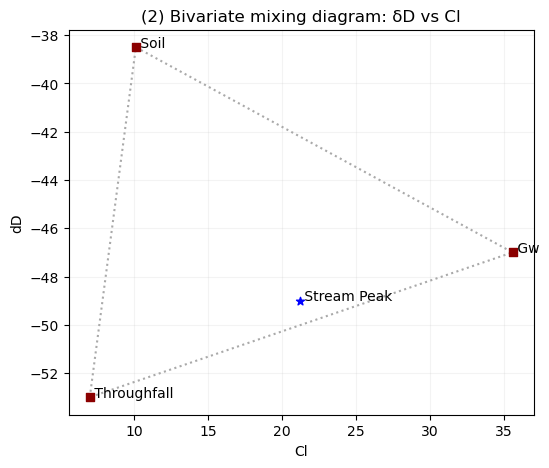

In [339]:
# Question 5, part 2a - Make mixing diagram (x = Cl, y = dD)

def plot_mixing_diagram(endmembers, stream, xtracer, ytracer, title):
    xs = [endmembers[k][xtracer] for k in ["throughfall","soil","gw"]]
    ys = [endmembers[k][ytracer] for k in ["throughfall","soil","gw"]]

    plt.figure(figsize=(6,5))
    # triangle edges
    plt.plot(xs + [xs[0]], ys + [ys[0]], color="darkgrey", linestyle=":", zorder=1)
    # endmembers
    plt.scatter(xs, ys, marker="s", color="darkred", zorder=2)
    for k in ["throughfall","soil","gw"]:
        plt.text(endmembers[k][xtracer], endmembers[k][ytracer], f" {k.capitalize()}")

    # stream point
    plt.scatter([stream[xtracer]], [stream[ytracer]], marker="*", color="blue")
    plt.text(stream[xtracer], stream[ytracer], " Stream Peak")

    plt.xlabel(f"{xtracer}")
    plt.ylabel(f"{ytracer}")
    plt.title(title)
    plt.grid(True, alpha=0.15)
    plt.show()

plot_mixing_diagram(endmembers, stream, xtracer="Cl", ytracer="dD", title="(2) Bivariate mixing diagram: δD vs Cl")


#### Question 5, part 2b

The peak-flow stream point falls inside the δD–Cl mixing triangle, which is consistent with conservative three-endmember mixing (throughfall, soil water, groundwater) for this tracer pair and suggests no additional endmember is needed to explain the peak-flow composition.

In [340]:
fracs_d18O_Cl = three_component_fractions(endmembers, stream, tracer1="Cl", tracer2="d18O")
print_result("Question 5, Part 3 - Fractions using δ18O and Cl", fracs_d18O_Cl)



Question 5, Part 3 - Fractions using δ18O and Cl
throughfall    0.3933
soil           0.1233
gw             0.4834
dtype: float64
Sum = 1.000000
Inside mixing triangle? True


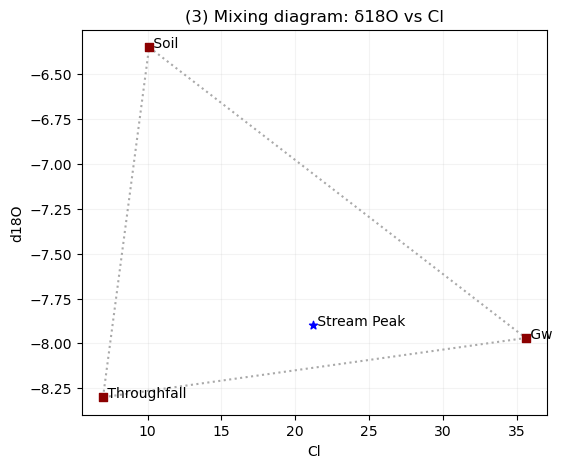

In [341]:
plot_mixing_diagram(endmembers, stream, xtracer="Cl", ytracer="d18O", title="(3) Mixing diagram: δ18O vs Cl")


In [342]:
fracs_dD_Na = three_component_fractions(endmembers, stream, tracer1="Na", tracer2="dD")
print_result("Question 5, Part 4 - Fractions using δD and Na", fracs_dD_Na)



Question 5, Part 4 - Fractions using δD and Na
throughfall    0.3912
soil           0.0408
gw             0.5680
dtype: float64
Sum = 1.000000
Inside mixing triangle? True


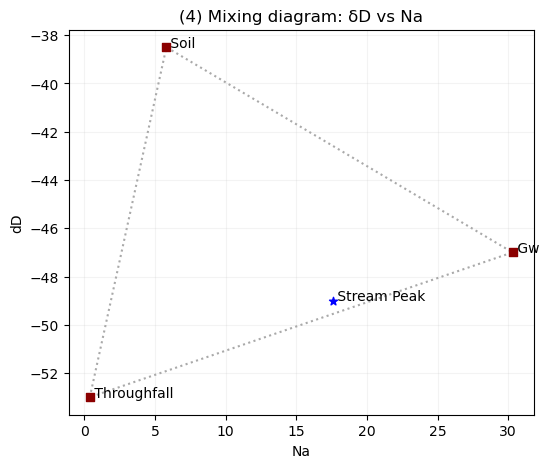

In [343]:
plot_mixing_diagram(endmembers, stream, xtracer="Na", ytracer="dD",
                    title="(4) Mixing diagram: δD vs Na")


In [344]:
# Question 5, Part 5 - Compare all results from 1, 3, 4 
# What is the dominant source of streamflow? 
# Is it consistent across calculations by different tracers?
# What could cause differences in calculations?

# -----------------------------
# STEP 1 — Create table of endmembers and calculated mixing fractions

results = pd.DataFrame({
    "δD + Cl":   fracs_dD_Cl,
    "δ18O + Cl": fracs_d18O_Cl,
    "δD + Na":   fracs_dD_Na,
})
results.loc["dominant_source"] = results.idxmax(axis=0)

results
# -----------------------------


,δD + Cl,δ18O + Cl,δD + Na
throughfall,0.43758,0.393268,0.391176
soil,0.073586,0.12332,0.04083
gw,0.488833,0.483412,0.567994
dominant_source,gw,gw,gw


#### Question 5, part 5 continued:

At peak streamflow, groundwater is the dominant contributor to streamflow, as indicated consistently by all three tracer-pair mixing calculations. Throughfall is the second-largest contributor, while soil water contributes only a minor fraction. Although the dominant source remains the same across tracer pairs, the calculated fractions differ somewhat among the tracer combinations. These discrepancies may reflect slight deviations from conservative behavior, spatial or temporal variability in endmember compositions, or analytical uncertainty.